ستون‌های دیتاست: Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')
Epoch 1/100


c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2712 - loss: 1.1309   
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4023 - loss: 1.0855 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4846 - loss: 0.9662 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4634 - loss: 0.9036 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4596 - loss: 0.8389 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4405 - loss: 0.7932 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5300 - loss: 0.7305
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7394 - loss: 0.7083 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - loss: 0.6371 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7785 - loss: 0.6330 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7753 - loss: 0.6133 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

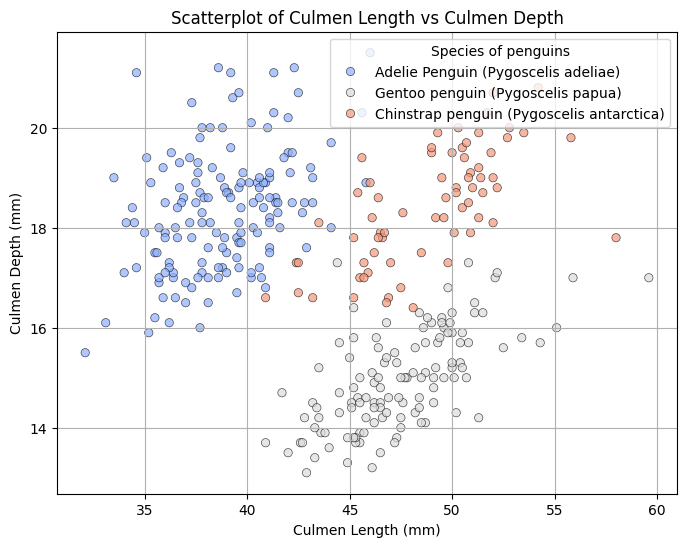

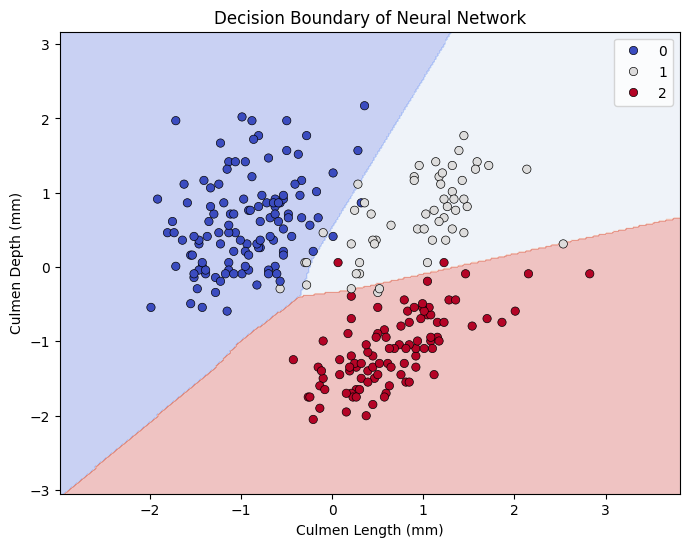

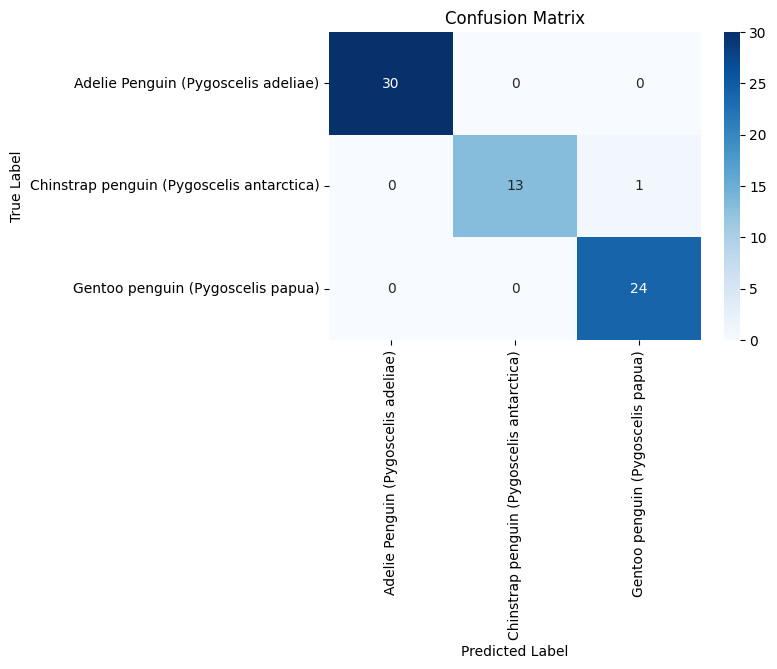

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# بارگذاری داده‌ها
penguins = pd.read_csv("C:/Users/A.S.T.co/Downloads/penguins.csv")

# بررسی نام ستون‌ها و اصلاح آنها در صورت نیاز
print("ستون‌های دیتاست:", penguins.columns)

# انتخاب ویژگی‌ها و برچسب هدف
features = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_name = "Species"

# بررسی و حذف مقادیر خالی
penguins_cleaned = penguins[features + [target_name]].dropna().drop_duplicates()

# جدا کردن ویژگی‌ها و برچسب‌ها
X = penguins_cleaned[features]
y = penguins_cleaned[target_name]

# تبدیل برچسب‌ها به مقادیر عددی با استفاده از LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تبدیل داده‌های استانداردشده به DataFrame برای خوانایی بهتر
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

# ساخت مدل شبکه عصبی
model = Sequential()

# افزودن لایه ورودی و لایه پنهان
model.add(Dense(8, input_dim=2, activation='relu'))  # 8 نرون در لایه پنهان با تابع فعال‌سازی ReLU

# افزودن لایه خروجی
model.add(Dense(3, activation='softmax'))  # تعداد دسته‌ها (Species) برابر با 3 است

# کامپایل مدل
model.compile(loss='sparse_categorical_crossentropy',  # از categorical_crossentropy برای مشکلات چندکلاسه استفاده می‌شود
              optimizer='adam',  # بهینه‌ساز آدم
              metrics=['accuracy'])

# آموزش مدل
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

# پیش‌بینی روی داده‌های تست
y_pred_prob = model.predict(X_test_scaled)  # پیش‌بینی احتمال هر کلاس
y_pred = np.argmax(y_pred_prob, axis=1)  # تبدیل احتمال‌ها به برچسب‌های پیش‌بینی‌شده

# محاسبه و نمایش دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy:.2f}")

# رسم Scatterplot با تنظیمات بهتر
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Culmen Length (mm)", 
    y="Culmen Depth (mm)", 
    hue=target_name, 
    data=penguins_cleaned, 
    palette="coolwarm", 
    alpha=0.7,  # شفافیت نقاط
    edgecolor="black"  # لبه‌های نقاط را مشکی می‌کند
)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Scatterplot of Culmen Length vs Culmen Depth")
plt.legend(title="Species of penguins")
plt.grid(True)

# رسم مرز تصمیم‌گیری
h = .02  # گام گرید برای رسم
x_min, x_max = X_train_scaled[features[0]].min() - 1, X_train_scaled[features[0]].max() + 1
y_min, y_max = X_train_scaled[features[1]].min() - 1, X_train_scaled[features[1]].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# پیش‌بینی دسته‌بندی‌ها روی گرید
Z_prob = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z_prob, axis=1)
Z = Z.reshape(xx.shape)

# رسم مرز تصمیم‌گیری
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_train_scaled[features[0]], y=X_train_scaled[features[1]], hue=y_train, palette="coolwarm", edgecolor="k")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Decision Boundary of Neural Network")
plt.show()

# رسم ماتریس درهم‌ریختگی
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
